In [1]:
import os
import json
from tqdm import tqdm

print("开始加载分析集结果")
# data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_stats_origin.jsonl"
# data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_ana_stats.jsonl"
data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_dedup_output_stats.jsonl"
f1 = open(data_path_result, 'r', encoding='utf-8')
result = []
for line in tqdm(f1.readlines()):
    result_line = json.loads(line)
    result.append(result_line["__dj__stats__"])
print("加载分析结果集结束")
print("分析结果集大小：", len(result))
result[0]

开始加载分析集结果


100%|██████████| 409436/409436 [00:02<00:00, 192671.25it/s]


加载分析结果集结束
分析结果集大小： 409436


{'alnum_ratio': 0.7473684211,
 'char_rep_ratio': 0.0,
 'lang': 'zh',
 'lang_score': 0.96098423,
 'perplexity': 3028.4,
 'text_len': 665}

In [2]:
import pandas as pd
df = pd.DataFrame(result)
df.head()

,alnum_ratio,char_rep_ratio,lang,lang_score,perplexity,text_len
0,0.747368,0.0,zh,0.960984,3028.4,665
1,0.778947,0.0,zh,0.902399,2559.6,285
2,0.733083,0.0,zh,0.725051,2747.9,532
3,0.789802,0.0,zh,0.930022,1905.7,961
4,0.810540,0.0,zh,0.967694,2456.6,797


In [3]:
describe = df.describe()

In [4]:
from matplotlib import pyplot as plt

def plot_hist(df, column_name, max_label, step):
    label_count = [0] * int(max_label / step)
    x_list = [i for i in range(int(max_label / step))]
    x_list = [i * step for i in x_list]
    for i in tqdm(range(len(df))):
        if int(df[column_name][i]) < max_label:
            label_count[int(df[column_name][i]/step)] += 1
        else:
            label_count[-1] += 1
    print("label_count: ",label_count)
    print("sum of label_count: ", sum(label_count))
    plt.bar(x_list, label_count)
    plt.xlabel(column_name)
    plt.ylabel("count")
    plt.xlim(0, max_label)
    plt.tight_layout()
    plt.show()

In [5]:
def analyze_result(df, column_name, max_label, step):
    print(column_name + " mean: ", describe[column_name]["mean"])
    print(column_name + " std: ", describe[column_name]["std"])
    print(column_name + " 3-σ left: ", describe[column_name]["mean"] - 3 * describe[column_name]["std"])
    print(column_name + " 3-σ right: ", describe[column_name]["mean"] + 3 * describe[column_name]["std"])
    plot_hist(df, column_name, max_label, step)

alnum_ratio mean:  0.7193937465402416
alnum_ratio std:  0.056657004155295336
alnum_ratio 3-σ left:  0.5494227340743556
alnum_ratio 3-σ right:  0.8893647590061275


100%|██████████| 409436/409436 [00:05<00:00, 72552.07it/s]


label_count:  [13, 23, 64, 234, 890, 9139, 127357, 248468, 23248, 0]
sum of label_count:  409436


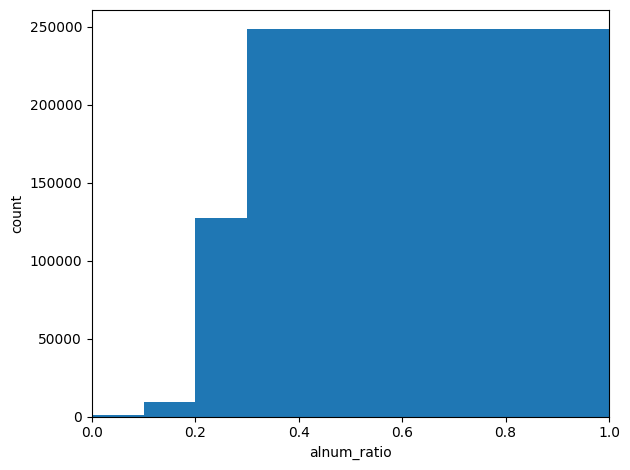

In [6]:
analyze_result(df, "alnum_ratio", 1, 0.1)

char_rep_ratio mean:  0.0017281995724543029
char_rep_ratio std:  0.019191030884759108
char_rep_ratio 3-σ left:  -0.05584489308182301
char_rep_ratio 3-σ right:  0.059301292226731625


100%|██████████| 409436/409436 [00:04<00:00, 86276.78it/s]


label_count:  [407677, 1087, 259, 178, 105, 56, 31, 26, 12, 5]
sum of label_count:  409436


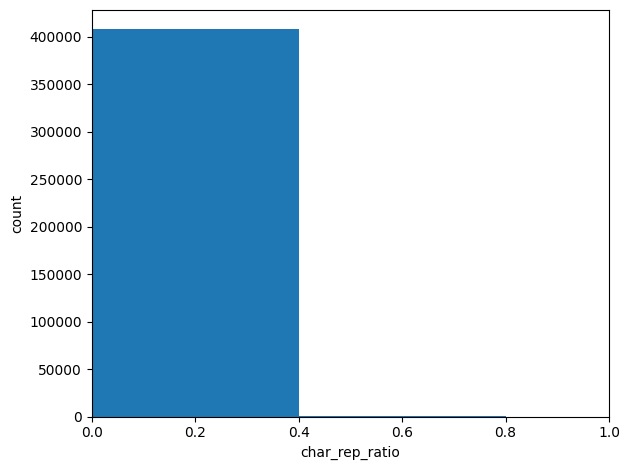

In [7]:
analyze_result(df, "char_rep_ratio", 1, 0.1)

lang_score mean:  0.8275949210938031
lang_score std:  0.10558003004166087
lang_score 3-σ left:  0.5108548309688205
lang_score 3-σ right:  1.1443350112187858


100%|██████████| 409436/409436 [00:04<00:00, 93261.24it/s]


label_count:  [2, 61, 176, 619, 2927, 11274, 34969, 85057, 159169, 115182]
sum of label_count:  409436


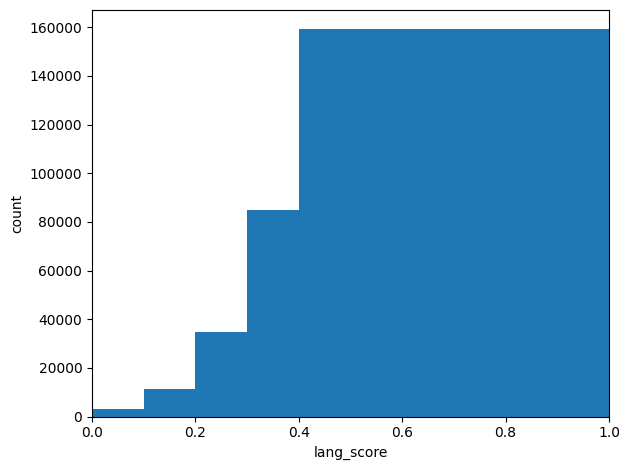

In [8]:
analyze_result(df, "lang_score", 1, 0.1)

perplexity mean:  2360.8591389130406
perplexity std:  738.353806396871
perplexity 3-σ left:  145.79771972242725
perplexity 3-σ right:  4575.920558103654


100%|██████████| 409436/409436 [00:07<00:00, 52318.69it/s]


label_count:  [1862, 136553, 203992, 55232, 9406, 1753, 430, 113, 36, 59]
sum of label_count:  409436


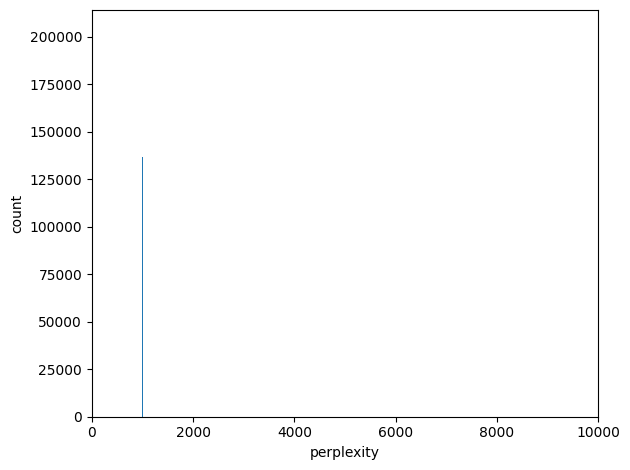

In [15]:
analyze_result(df, "perplexity", 10000, 1000)

text_len mean:  389.60085092664053
text_len std:  291.33102203318447
text_len 3-σ left:  -484.39221517291287
text_len 3-σ right:  1263.593917026194


100%|██████████| 409436/409436 [00:08<00:00, 48085.41it/s]


label_count:  [488, 7147, 22824, 42673, 53618, 52644, 46511, 37958, 30417, 115156]
sum of label_count:  409436


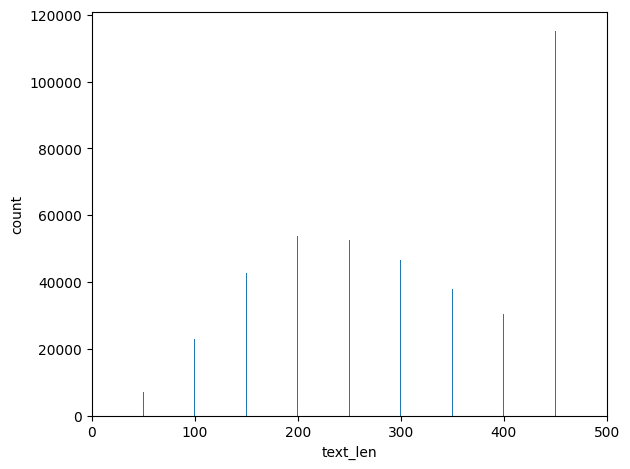

In [14]:
analyze_result(df, "text_len", 500, 50)

In [11]:
print("开始加载数据集")
# data juicer保存的输出文件是jsonl格式，这里需要逐行读取
data_path_juicer = os.environ.get('HOME') + "/cook-data/recipe_corpus_dedup.jsonl"
f1 = open(data_path_juicer, 'r', encoding='utf-8')
json_data = []
for line in tqdm(f1.readlines()):
    json_data.append(json.loads(line))
f1.close()
print("加载数据集结束")

开始加载数据集


FileNotFoundError: [Errno 2] No such file or directory: 'F:/OneDrive/Pythoncode/cook-data/recipe_corpus_dedup.jsonl'

In [ ]:
count_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang in count_dict:
        count_dict[lang] += 1
    else:
        count_dict[lang] = 1
print(count_dict)

In [ ]:
lang_list_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang not in lang_list_dict:
        lang_list_dict[lang] = []
    lang_list_dict[lang].append(i)

In [ ]:
n = 10
lang = 'en'
for i in range(n):
    print(json_data[lang_list_dict[lang][i]]['name'])

In [ ]:
n = 10
m=0
for i in tqdm(range(len(df))):
    if df["perplexity"][i] > 20000:
        print(json_data[i]['name'])
        m += 1
    if m > n:
        break